Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United  

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


DBSCAN

In [4]:
crime=pd.read_csv('/content/crime_data.csv')

FileNotFoundError: ignored

In [ ]:
crime


In [ ]:
crime.info()

In [ ]:
crime.drop(["Unnamed: 0"],axis=1,inplace=True)
crime

In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

In [ ]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

In [ ]:
crime.groupby('clusters').agg(['mean']).reset_index()

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

K MEANS

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
crime1=pd.read_csv('/content/crime_data.csv')

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(crime1.iloc[:,1:])

In [ ]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# selecting 4 clusters from above  plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

In [ ]:
x=pd.Series(model.labels_)
crime1['Clust']=x

In [ ]:
crime1

In [ ]:
crime1.iloc[:,1:5].groupby(crime1.Clust).mean()

HIerarchical clustering

In [ ]:
crim=pd.read_csv('/content/crime_data.csv')
crim

In [ ]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
df_norm=norm_func(crim.iloc[:,1:])

In [ ]:
df_norm

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [ ]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

In [ ]:
y_hc=hc.fit_predict(df_norm)

In [ ]:
y_hc

In [ ]:
crim['h_clusterid']=hc.labels_
crim

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [6]:
airline=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [8]:
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [21]:
# Column rename.

airline= airline.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [20]:
# data preprocessing
airline2=  airline.drop(['ID','Award'], axis=1)
airline2.head()


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0            1                  0                0               7000  
1            2                  0                0               6968  
2            4                  0                0               7034  
3            1                  0                0               6952  
4           26               2077                4               6935

In [11]:
# Normalize heterogenous numerical data 
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.970414         0.0   0.000034   0.000034   0.000034     0.006000   
1     0.940209         0.0   0.000049   0.000049   0.000049     0.010504   
2     0.981113         0.0   0.000024   0.000024   0.000024     0.097817   
3     0.904428         0.0   0.000061   0.000061   0.000061     0.030605   
4     0.912226         0.0   0.000037   0.000009   0.000009     0.404078   
...        ...         ...        ...        ...        ...          ...   
3994  0.905810         0.0   0.000049   0.000049   0.000049     0.417949   
3995  0.999649         0.0   0.000016   0.000016   0.000016     0.015231   
3996  0.944948         0.0   0.000039   0.000013   0.000013     0.326726   
3997  0.999592         0.0   0.000018   0.000018   0.000018     0.009104   
3998  0.907271         0.0   0.000301   0.000301   0.000301     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0        0.000034           0.000000         0.000000           0.241371  
1        0.000098           0.000000         0.000000           0.340437  
2        0.000095           0.000000         0.000000           0.166880  
3        0.000061           0.000000         0.000000           0.425527  
4        0.000243           0.019383         0.000037           0.064718  
...           ...                ...              ...                ...  
3994     0.000196           0.009805         0.000049           0.068784  
3995     0.000078           0.000000         0.000000           0.021659  
3996     0.000103           0.000000         0.000000           0.018001  
3997     0.000018           0.009104         0.000018           0.025509  
3998     0.000000           0.000000         0.000000           0.420546  

[3999 rows x 10 columns]

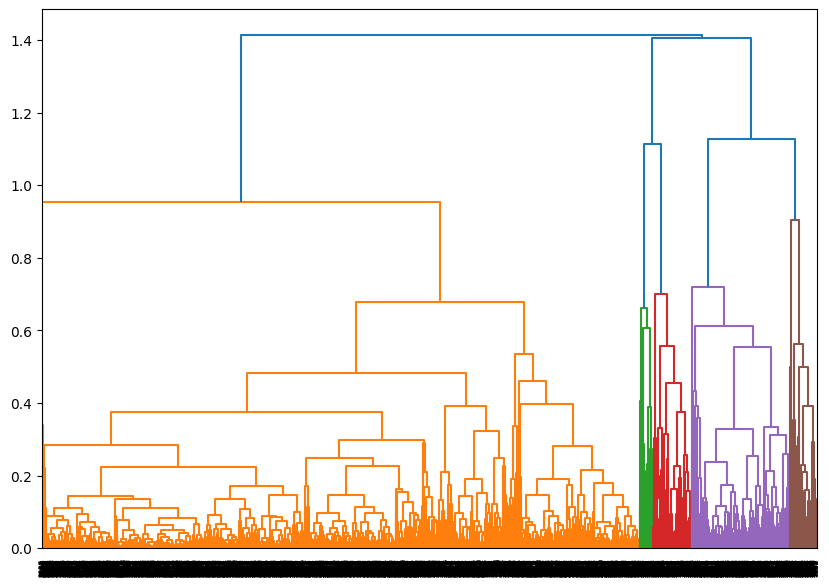

In [12]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [13]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [14]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [15]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      clustersid  
0              4  
1              2  
2              2  
3              2  
4              3  
...          ...  
3994           3  
3995           4  
3996           2  
3997           4  
3998           2  

[3999 rows x 11 columns]

In [16]:

airline2.groupby('clustersid').agg(['mean']).reset_index()

clustersid       Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                      mean        mean      mean      mean      mean   
0          0   5524.222707    8.755459  1.000000  1.000000  1.000000   
1          1  31066.514349  111.415011  3.200883  1.026490  1.070640   
2          2  81201.080802  136.521008  2.115061  1.013575  1.000646   
3          3  69569.894646   97.257340  3.326425  1.032815  1.022453   
4          4  94957.590260  215.220823  1.141058  1.005038  1.002519   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0    584.532751    2.401747         66.982533        0.209607   
1  40266.935982   17.289183        626.754967        1.812362   
2  16350.149968   13.574014        488.550743        1.340659   
3  35743.675302   17.784111        406.804836        1.274611   
4   3524.928631    5.640638        461.104954        1.521411   

  Days_since_enroll  
               mean  
0       4875.301310  
1       4205.624724  
2       4285.891403  
3       4090.832470  
4       3736.071369

In [17]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) 

Kmeans


In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
airline=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [24]:
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [25]:
airline2=airline.drop(['ID#'],axis=1)
airline2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [26]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [27]:
# Normalize heterogenous numerical data by using Standard Scaler
airline2_norm=StandardScaler().fit_transform(airline2)


In [28]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [29]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [30]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [32]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [33]:
# Assign clusters to the data set
airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters4id  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          1            3  
...      ...          ...  
3994       1            0  
3995       1            0  
3996       1            3  
3997       0            0  
3998       0            0  

[3999 rows x 12 columns]

In [34]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_


array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [35]:
# Group data by Clusters (K=4)
airline4.groupby('clusters4id').agg(['mean']).reset_index()


clusters4id        Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean        mean      mean      mean      mean   
0           0   43828.396152   97.283863  1.223007  1.019238  1.000393   
1           1  138061.400000   78.800000  3.466667  1.000000  4.066667   
2           2  194432.643750  794.981250  2.168750  1.037500  1.000000   
3           3  117087.423649  156.736883  3.697729  1.002349  1.001566   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0   4707.805654    6.926973        201.254417        0.624656   
1  93927.866667   28.066667        506.666667        1.600000   
2  31897.281250   27.331250       5465.837500       16.018750   
3  39200.451057   18.761942        348.499608        1.029757   

  Days_since_enroll    Award?  
               mean      mean  
0       3693.855124  0.201413  
1       4613.866667  0.533333  
2       4708.400000  0.812500  
3       4885.918559  0.649961

In [36]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters4id'],airline4['Balance'], c=clusters4.labels_) 

In [37]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [38]:
clusters5.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [39]:
# Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clusters5id  
0          0            0  
1          0            0  
2          0            0  
3          0            0  
4          1            3  
...      ...          ...  
3994       1            0  
3995       1            0  
3996       1            3  
3997       0            0  
3998       0            0  

[3999 rows x 12 columns]

In [40]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[-2.97441370e-01, -6.26013958e-02, -6.09944285e-01,
        -9.82418871e-02, -6.07159307e-02, -5.21330789e-01,
        -5.01454441e-01, -1.87180704e-01, -1.99831577e-01,
        -2.10475283e-01, -3.52420208e-01],
       [ 1.14970340e+00,  1.06407580e+00,  1.02900923e-01,
        -9.82418871e-02, -6.27665798e-02,  5.78252911e-01,
         1.52034538e+00,  3.44900129e+00,  3.66768718e+00,
         2.64756357e-01,  8.99553448e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 4.24748143e-01, -1.21396375e-02,  1.19282031e+00,
        -9.82418871e-02, -5.47249449e-02,  9.11488076e-01,
         7.40508649e-01, -9.38523027e-02, -1.02849450e-01,
         3.77190968e-01,  5.65958814e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [41]:
# Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

clusters5id        Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean        mean      mean      mean      mean   
0           0   43669.876000   95.611600  1.221200  1.000000  1.000400   
1           1  189448.964497  967.248521  2.201183  1.000000  1.000000   
2           2  138061.400000   78.800000  3.466667  1.000000  4.066667   
3           3  116436.737421  134.935535  3.702830  1.000000  1.001572   
4           4   68876.581395   23.255814  1.139535  2.348837  1.000000   

    Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
           mean        mean              mean            mean   
0   4568.151200    6.791600        197.838000        0.615200   
1  31108.467456   26.201183       5288.775148       15.284024   
2  93927.866667   28.066667        506.666667        1.600000   
3  39185.495283   18.721698        329.176101        0.985063   
4  14689.837209   17.534884        582.627907        2.209302   

  Days_since_enroll    Award?  
               mean      mean  
0       3684.750400  0.200000  
1       4665.248521  0.804734  
2       4613.866667  0.533333  
3       4897.754717  0.644654  
4       3968.930233  0.395349

In [42]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 
